This notebook is designed to implement the Quantile UCB algorithm imposed in [QuantUCB Construction](https://www.overleaf.com/read/dxfvfpqsdrcb).

Policy: Expectation + Quantile

Estimation method: Empirical quantile estimation + linear interpolation

Assumptions: normal distribution with known mean and variance, small and bounded KL divergence between quantile estimation and true quantile, strictly increasing and differentiable cdf 

In [1]:
from UCB_discrete import Environment, QuantUCB_Gau
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import defaultdict
import math
from scipy.stats import entropy

### Quantile Estimation Experiment

In [2]:
def emp_quant(alpha, data):
    """implement empirical quantile estimation. 
    
    Parameters
    -----------------------------------
    data: list
        sequence of sample rewards
    alpha: 
        level of quantile

    Return
    ------------------------------------
    quantile: float
        alpha level quantile of given data
    """
        
    data = np.sort(data)
    idx = int(len(data) * alpha)
    return data[idx]

def linear_inter_quant(alpha, data):
    """implement linear interpolation for quantile estimation.
    
    Parameters
    -----------------------------------
    data: list
        sequence of sample rewards
    alpha: 
        level of quantile

    Return
    ------------------------------------
    quantile: float
        alpha level quantile of given data
    """
    size = len(data) 
    data = list(data)
    data.append(-2)
    data = np.sort(data)
    s = int(alpha * size) 
    rate = (data[s + 1] - data[s]) * size
    #b = data[s] * (1-s) - data[s+1]
    #return rate * alpha + b
    return rate * (alpha - float(s)/size) + data[s]
    
    
def kl(est_quant, true_quant):
    pass

In [3]:
data = list(np.random.normal(0,1,5))

In [4]:
data

[-0.49879335063271496,
 0.09455094236806531,
 1.3238942241781286,
 -2.060041509023756,
 1.3109860575782883]

In [5]:
quantile = []
quantile_inter = []
qrange = np.arange(0,1,0.001)

for alpha in qrange:
    quantile.append(emp_quant(alpha, data))
    quantile_inter.append(linear_inter_quant(alpha, data))
    
#print(quantile)
#print(quantile_inter)
entropy(quantile_inter, np.sort(np.random.normal(0,1,1000)))

inf

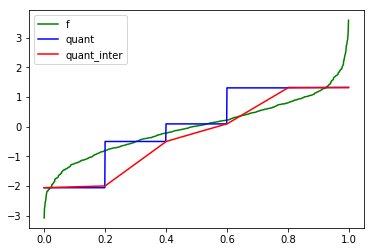

In [12]:
#plt.plot(x_axis,np.sort(data), 'yo', label = 'sample')
plt.plot(np.arange(0,1,0.001), np.sort(np.random.normal(0,1,1000)), 'g', label = 'f')
plt.plot(qrange, quantile, '-b',label = 'quant')
plt.plot(qrange, quantile_inter, '-r', label = 'quant_inter')
plt.legend()
plt.savefig('Quantile Estimation.png')

### Quantile UCB with Gaussian rewards

In [7]:
env = [Environment(0,1,0), Environment(1,1,0)]
num_exper = 50
num_rounds = 2000
bestarm = 1

In [8]:
QuantUCB_regret = []
print('Simulate QuantUCB:')
for i in range(num_exper):
    QuantUCB_agent = QuantUCB_Gau(env, num_rounds, bestarm)
    regret = QuantUCB_agent.play()
    QuantUCB_regret.append(regret)
QuantUCB_regret = np.mean(np.asarray(QuantUCB_regret), axis = 0)

Simulate QuantUCB:


In [9]:
def regret_bound(t, env, bestarm):
    rb = 0
    for i in range(len(env)):
        mu_diff = env[bestarm].loc - env[i].loc
        if i != bestarm:
            rb += 32 * env[i].scale * np.log(t)/ mu_diff + (1 + np.pi ** 2/3.0) * mu_diff
    return rb

regret_bound_list = []
for i in range(num_rounds):
    if i >0:
        regret_bound_list.append(regret_bound(i, env, bestarm))

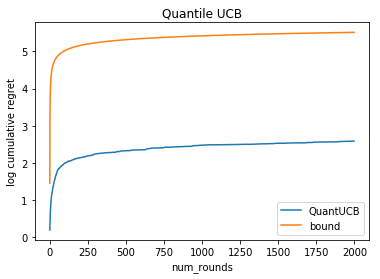

In [10]:
plt.plot(np.log(QuantUCB_regret), label = 'QuantUCB')
plt.plot(np.log(regret_bound_list), label = 'bound')
plt.ylabel('log cumulative regret')
plt.xlabel('num_rounds')
plt.title('Quantile UCB')
plt.legend()